### What is the relationship between TikTok views and Spotify streams?

In [2]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression
import matplotlib.ticker as ticker      # for formatting axis ticks (e.g., adding commas to large numbers)

# Load the CSV file
file_path = 'Resources/new_data.csv'
csv_df = pd.read_csv(file_path, header=0)

# Display sheet names to identify relevant data
print(csv_df)

                                Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date All Time Rank Spotify Streams  \
0      Tommy Richman    4/26/202

In [18]:
# Select relevant columns

columns_to_select=['Track', 'Artist', 'Spotify Popularity', 'Spotify Streams', 'TikTok Views']

tiktok_views_data = csv_df[columns_to_select].copy()

# Rename specific columns
tiktok_views_data.rename(columns={'Track': 'Song'}, inplace=True)

tiktok_views_data.head()

,Song,Artist,Spotify Popularity,Spotify Streams,TikTok Views
0,MILLION DOLLAR BABY,Tommy Richman,92.0,"390,470,936","5,332,281,936"
1,Not Like Us,Kendrick Lamar,92.0,"323,703,884","208,339,025"
2,i like the way you kiss me,Artemas,92.0,"601,309,283","3,369,120,610"
3,Flowers,Miley Cyrus,85.0,"2,031,280,633","14,603,725,994"
4,Houdini,Eminem,88.0,"107,034,922",NaN


In [19]:
# Show count of each column
tiktok_views_data.count()

Song                  4600
Artist                4595
Spotify Popularity    3796
Spotify Streams       4487
TikTok Views          3619
dtype: int64

In [20]:
# Drop blank rows
tiktok_views_data_clean = tiktok_views_data.dropna()
tiktok_views_data_clean.count()

Song                  3302
Artist                3302
Spotify Popularity    3302
Spotify Streams       3302
TikTok Views          3302
dtype: int64

In [21]:
# Show new data
print(tiktok_views_data_clean.dtypes)

Song                   object
Artist                 object
Spotify Popularity    float64
Spotify Streams        object
TikTok Views           object
dtype: object


In [22]:
# Spotify Streams and TikTok Views are objects - convert to numeric
# Function to convert to numeric
def convert_to_numeric(value):
    if pd.isna(value):                              # check if value is NaN
        return np.nan
    try:
        return float(str(value).replace(',', ''))   # Remove commas and convert to float
    except ValueError:                              # handle cases where conversion fails
        return np.nan

# Apply the conversion to both columns
tiktok_views_data_clean['Spotify Streams'] = tiktok_views_data_clean['Spotify Streams'].apply(convert_to_numeric)
tiktok_views_data_clean['TikTok Views'] = tiktok_views_data_clean['TikTok Views'].apply(convert_to_numeric)

# Check the results
print("After conversion:")
print(tiktok_views_data_clean[['Spotify Streams', 'TikTok Views', 'Spotify Popularity']].dtypes)
print(tiktok_views_data_clean[['Spotify Streams', 'TikTok Views', 'Spotify Popularity']].count())

# Check for any remaining non-numeric values
print("\nNon-numeric values in Spotify Streams:")
print(tiktok_views_data_clean[pd.isna(tiktok_views_data_clean['Spotify Streams'])]['Spotify Streams'].head())

print("\nNon-numeric values in TikTok Views:")
print(tiktok_views_data_clean[pd.isna(tiktok_views_data_clean['TikTok Views'])]['TikTok Views'].head())

# Display sample of original values
print("\nSample of original Spotify Streams values:")
print(tiktok_views_data_clean['Spotify Streams'].head())

print("\nSample of original TikTok Views values:")
print(tiktok_views_data_clean['TikTok Views'].head())

After conversion:
Spotify Streams       float64
TikTok Views          float64
Spotify Popularity    float64
dtype: object
Spotify Streams       3302
TikTok Views          3302
Spotify Popularity    3302
dtype: int64

Non-numeric values in Spotify Streams:
Series([], Name: Spotify Streams, dtype: float64)

Non-numeric values in TikTok Views:
Series([], Name: TikTok Views, dtype: float64)

Sample of original Spotify Streams values:
0    3.904709e+08
1    3.237039e+08
2    6.013093e+08
3    2.031281e+09
5    6.706654e+08
Name: Spotify Streams, dtype: float64

Sample of original TikTok Views values:
0    5.332282e+09
1    2.083390e+08
2    3.369121e+09
3    1.460373e+10
5    2.938687e+09
Name: TikTok Views, dtype: float64


C:\Users\sarah\AppData\Local\Temp\ipykernel_45012\674970343.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_views_data_clean['Spotify Streams'] = tiktok_views_data_clean['Spotify Streams'].apply(convert_to_numeric)
C:\Users\sarah\AppData\Local\Temp\ipykernel_45012\674970343.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_views_data_clean['TikTok Views'] = tiktok_views_data_clean['TikTok Views'].apply(convert_to_numeric)


In [23]:
# Sort by TikTok Views
tik_tok_sort = tiktok_views_data_clean.sort_values(by='TikTok Views', ascending=True)

tik_tok_sort.to_csv('check.csv',index=False)

### Scatterplot of TikTok Views vs. Spotify Popularity

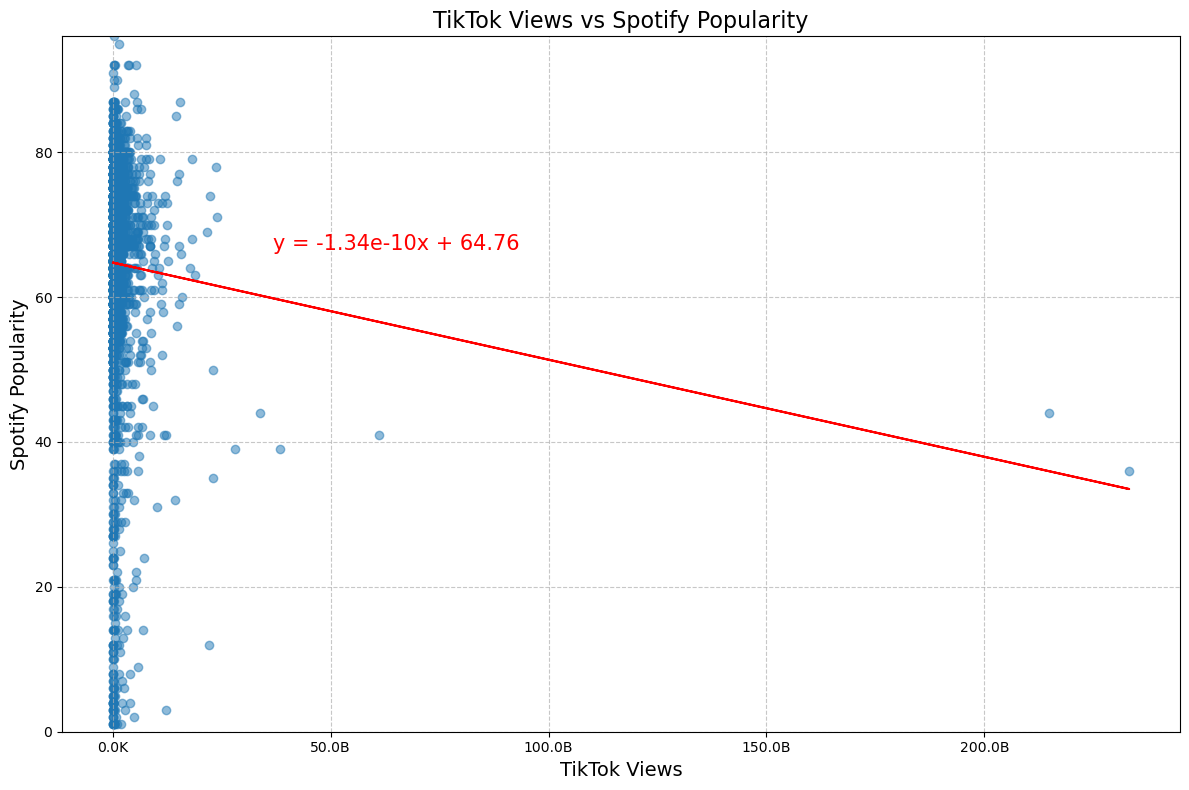

Correlation between TikTok Views and Spotify Popularity: -0.0578
R-squared: 0.0033


In [24]:
# Define a function to format axis ticks
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'  # convert to billions (e.g. 1,000,000,000 -> 1.0B)
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'  # convert to millions (e.g. 1,000,000 -> 1.0M)
    else:
        return f'{x/1e3:.1f}K'  # convert to thousands (e.g. 1,000 -> 1.0K)

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(tiktok_views_data_clean['TikTok Views'], 
            tiktok_views_data_clean['Spotify Popularity'], 
            alpha=0.5)          # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(tiktok_views_data_clean['TikTok Views'], 
                                                            tiktok_views_data_clean['Spotify Popularity'])
line = slope * tiktok_views_data_clean['TikTok Views'] + intercept

# Plot the line of best fit
plt.plot(tiktok_views_data_clean['TikTok Views'], line, color='r', 
         label=f'y = {slope:.2e}x + {intercept:.2f}')     # uses scientific notation for slope for readability

# Add the formula as a label on the graph
x_pos = tiktok_views_data_clean['TikTok Views'].mean()    # x-position for the label
y_pos = slope * x_pos + intercept                         # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10),                             # offest text so it's not directly on top of data
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Views', fontsize=14)
plt.ylabel('Spotify Popularity', fontsize=14)
plt.title('TikTok Views vs Spotify Popularity', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_popularity = tiktok_views_data_clean['Spotify Popularity'].max()
plt.ylim(0, max_popularity)                               # this sets the y-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = tiktok_views_data_clean['TikTok Views'].corr(tiktok_views_data_clean['Spotify Popularity'])
print(f"Correlation between TikTok Views and Spotify Popularity: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

#### Analysis Summary

###### The correlation coefficient of -0.0578 between TikTok Views and Spotify Popularity indicates a very weak negative correlation between these two factors. Since the value is so close to zero, it suggests only a slight tendency for Spotify Popularity to decrease as TikTok Likes increase, and vice versa. However, this relationship is not significant enough to have any meaningful impact when predicting an artist's popularity. The near-zero correlation also points to the possibility that TikTok Views and Spotify Popularity are largely independent variables.

###### The line of best fit is represented by the equation y = -1.34e-10x + 64.76, with an R-squared value of 0.0033. This further reinforces the notion that the two variables do not show any meaningful predictive relationship.

###### For the next steps, I will narrow the dataset to the top 500 entries and further explore the relationship between TikTok views and Spotify streams.

# Top 500 TikTok Views vs. Spotify Streams

In [25]:
# Create top 500 TikTok dataframe

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = tiktok_views_data_clean.sort_values(by='TikTok Views', ascending=False).head(501)

# Remove the 'Grand Total' row
top_500_tiktok_df = top_500_tiktok_df[top_500_tiktok_df['Song'] != 'Grand Total']

# Apply styling for better readability (for display purposes)
formatted_top_500_df = top_500_tiktok_df[['Song', 'TikTok Views', 'Spotify Streams']].style.format({
    'Sum of TikTok Likes': '{:,.2f}',
    'Sum of YouTube Likes': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'Sum of YouTube Views': '{:,.2f}',
    'Sum of TikTok Views': '{:,.2f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})


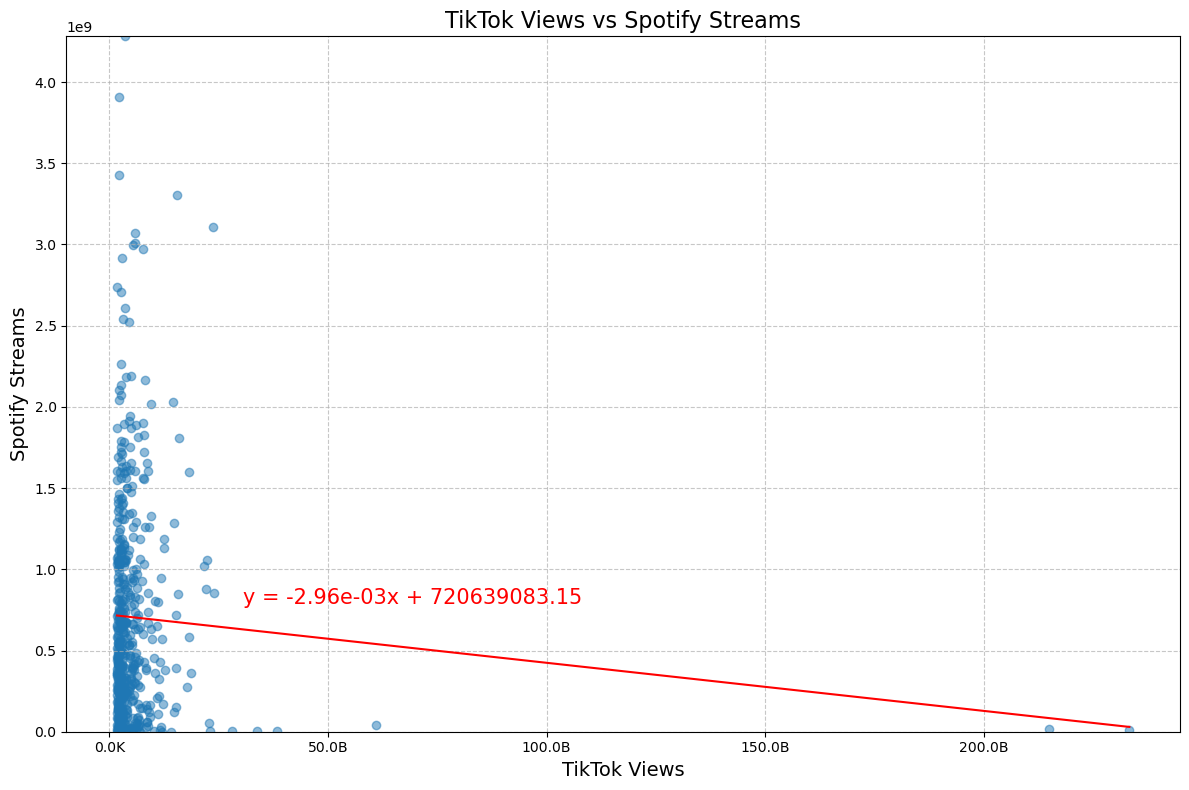

Correlation between TikTok Views and Spotify Streams: -0.0641
R-squared: 0.0041


In [ ]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500_tiktok_df['TikTok Views'], 
            top_500_tiktok_df['Spotify Streams'], 
            alpha=0.5)          # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_tiktok_df['TikTok Views'], 
                                                            top_500_tiktok_df['Spotify Streams'])
line = slope * top_500_tiktok_df['TikTok Views'] + intercept

# Plot the line of best fit
plt.plot(top_500_tiktok_df['TikTok Views'], line, color='r', 
         label=f'y = {slope:.2e}x + {intercept:.2f}')     # uses scientific notation for slope for readability

# Add the formula as a label on the graph
x_pos = top_500_tiktok_df['TikTok Views'].mean()          # x-position for the label
y_pos = slope * x_pos + intercept                         # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10),                             # offest text so it's not directly on top of data
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Views', fontsize=14)
plt.ylabel('Spotify Streams', fontsize=14)
plt.title('TikTok Views vs Spotify Streams', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_popularity = top_500_tiktok_df['Spotify Streams'].max()
plt.ylim(0, max_popularity)                               # this sets the y-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = top_500_tiktok_df['TikTok Views'].corr(top_500_tiktok_df['Spotify Streams'])
print(f"Correlation between TikTok Views and Spotify Streams: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

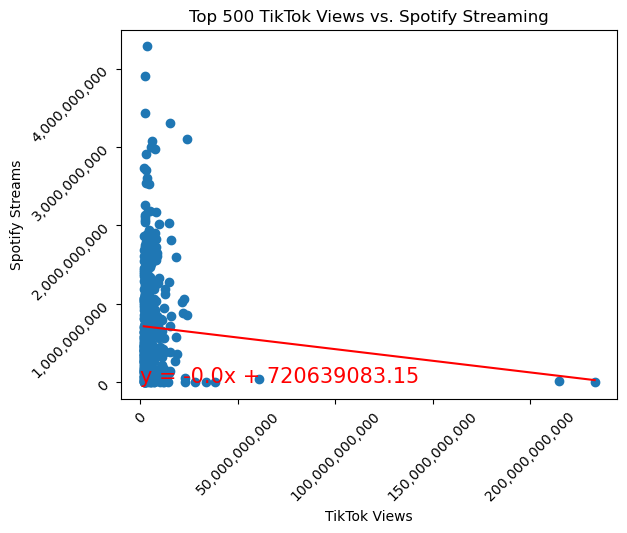

The r^2-value is: 0.004102956652237007


In [26]:
# Spotify vs TikTok Views
# Does high TikTok views correlate to high spotify streams?

x_values = top_500_tiktok_df['TikTok Views']
y_values = top_500_tiktok_df['Spotify Streams']

# the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("TikTok Views")
plt.ylabel("Spotify Streams")
plt.title("Top 500 TikTok Views vs. Spotify Streaming")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust x-axis and y-axis to show full values with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

print(f"The r^2-value is: {rvalue**2}")

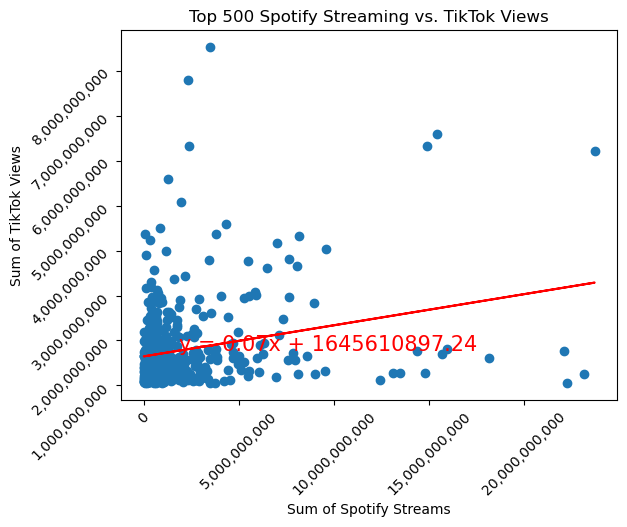

The r^2-value is: 0.06163812836490474


In [36]:
# Spotify vs TikTok Views - spotify as the independent variable

x_values = top_500_spotify_df['Sum of TikTok Views']
y_values = top_500_spotify_df['Sum of Spotify Streams']

# the output will be a tuple of multiple values for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.mean(),y_values.mean()),fontsize=15,color="red")

plt.ylabel("Sum of TikTok Views")
plt.xlabel("Sum of Spotify Streams")
plt.title("Top 500 Spotify Streaming vs. TikTok Views")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust x-axis and y-axis to show full values with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

print(f"The r^2-value is: {rvalue**2}")

In [40]:
# Does the top 10 most viewed TikTok songs have high spotify streaming?

# Create a bar chat

# Sort DataFrame by TikTok Views in descending order
top_ten_tiktok_df = top_500_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(10)

# Display top 10 TikTok-viewed songs with their Spotify Streams
top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']]

# Apply styling for better readability (for display purposes)
formatted_ten_tiktok_df = top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']].style.format({
    'Sum of TikTok Views': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',  # Add commas, 2 decimals
})

formatted_ten_tiktok_df


,Song,Sum of TikTok Views,Sum of Spotify Streams
3201,Monkeys Spinning Monkeys,"233,232,311,463.00","11,477,477.00"
2962,Love You So,"214,843,956,590.00","16,326,628.00"
2863,Oh No,"61,088,562,861.00","40,284,121.00"
3500,Funny Song,"39,946,312,291.00","5,866,282.00"
3011,Aesthetic,"39,850,634,464.00","33,025,746.00"
3646,Pieces,"28,032,695,489.00","5,467,217.00"
407,love nwantiti (ah ah ah),"23,933,379,729.00","853,451,422.00"
4,STAY (with Justin Bieber),"23,712,377,029.00","6,214,200,698.00"
108,Astronaut In The Ocean,"23,156,752,648.00","1,251,675,613.00"
3503,Beat Automotivo Tan Tan Tan Viral,"22,918,660,728.00","7,382,759.00"


In [41]:
# Create a bar chart comparing percentages of TikTok Views and Spotify streaming

# Calculate the percentages
total_tiktok = top_ten_tiktok_df['Sum of TikTok Views'].sum()     # find the total sum first
total_spotify  = top_ten_tiktok_df['Sum of Spotify Streams'].sum()

# Convert each song into a percentage of the total
top_ten_tiktok_df['TikTok Percentage'] = (top_ten_tiktok_df['Sum of TikTok Views'] / total_tiktok) * 100
top_ten_tiktok_df['Spotify Percentage'] = (top_ten_tiktok_df['Sum of Spotify Streams'] / total_spotify) * 100

# Apply styling for better readability
formatted_ten_tiktok_df = top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams', 'TikTok Percentage', 'Spotify Percentage']].style.format({
    'Sum of TikTok Views': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'TikTok Percentage': '{:.0f}%',
    'Spotify Percentage': '{:.0f}%'
})

formatted_ten_tiktok_df

,Song,Sum of TikTok Views,Sum of Spotify Streams,TikTok Percentage,Spotify Percentage
3201,Monkeys Spinning Monkeys,"233,232,311,463.00","11,477,477.00",33%,0%
2962,Love You So,"214,843,956,590.00","16,326,628.00",30%,0%
2863,Oh No,"61,088,562,861.00","40,284,121.00",9%,0%
3500,Funny Song,"39,946,312,291.00","5,866,282.00",6%,0%
3011,Aesthetic,"39,850,634,464.00","33,025,746.00",6%,0%
3646,Pieces,"28,032,695,489.00","5,467,217.00",4%,0%
407,love nwantiti (ah ah ah),"23,933,379,729.00","853,451,422.00",3%,10%
4,STAY (with Justin Bieber),"23,712,377,029.00","6,214,200,698.00",3%,74%
108,Astronaut In The Ocean,"23,156,752,648.00","1,251,675,613.00",3%,15%
3503,Beat Automotivo Tan Tan Tan Viral,"22,918,660,728.00","7,382,759.00",3%,0%


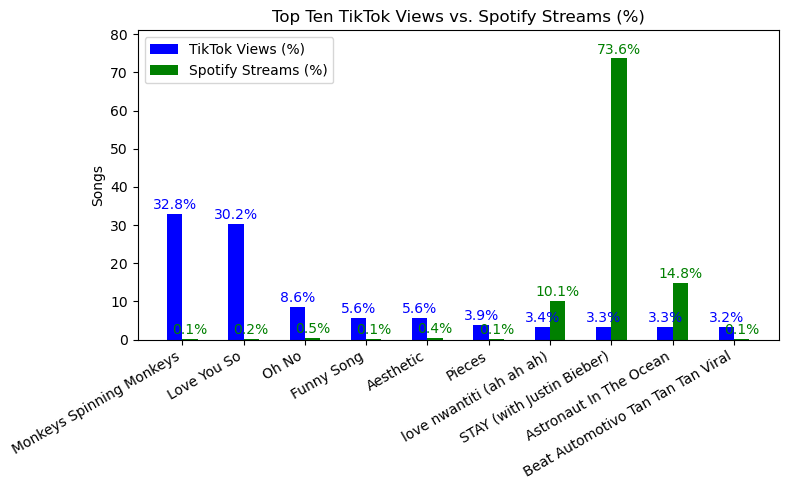

In [42]:
# Prepare the bar chart
x = np.arange(len(top_ten_tiktok_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_tiktok_df['TikTok Percentage'], width, label='TikTok Views (%)', color='blue')
spotify_bar = ax.bar(x+width/2, top_ten_tiktok_df['Spotify Percentage'], width, label='Spotify Streams (%)', color='green')

# Formatting
ax.set_ylabel('Percentage (%)')
ax.set_ylabel('Songs')
ax.set_title('Top Ten TikTok Views vs. Spotify Streams (%)')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_tiktok_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

# Fix y-limit to match percentage values
max_percentage = max(top_ten_tiktok_df['TikTok Percentage'].max(), top_ten_tiktok_df['Spotify Percentage'].max())
ax.set_ylim(0, max_percentage * 1.1)     # Set y-limit slightly above max percentage

# Add labels above bars
for i, (tiktok, spotify) in enumerate(zip(top_ten_tiktok_df['TikTok Percentage'], top_ten_tiktok_df['Spotify Percentage'])):
    ax.text(i - width/2, tiktok + 0.5, f"{tiktok:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(i + width/2, spotify + 0.5, f"{spotify:.1f}%", ha='center', va='bottom', fontsize=10, color='green')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [44]:
# Does the top 10 Spotify songs have high TikTok views?
# Create a bar chart comparing percentages of TikTok Views and Spotify streaming

# Sort DataFrame by TikTok Views in descending order
top_ten_spotify_df = top_500_spotify_df.sort_values(by='Sum of Spotify Streams', ascending=False).head(10)

# Display top 10 Spotify songs with their TikTok views
top_ten_spotify_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']]

# Apply styling for better readability (for display purposes)
formatted_ten_spotify_df = top_ten_spotify_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']].style.format({
    'Sum of TikTok Views': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',  # Add commas, 2 decimals
})

# Calculate the percentages
total_tiktok = top_ten_spotify_df['Sum of TikTok Views'].sum()     # find the total sum first
total_spotify  = top_ten_spotify_df['Sum of Spotify Streams'].sum()

# Convert each song into a percentage of the total
top_ten_spotify_df['TikTok Percentage'] = (top_ten_spotify_df['Sum of TikTok Views'] / total_tiktok) * 100
top_ten_spotify_df['Spotify Percentage'] = (top_ten_spotify_df['Sum of Spotify Streams'] / total_spotify) * 100

# Apply styling for better readability
formatted_ten_spotify_df = top_ten_spotify_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams', 'TikTok Percentage', 'Spotify Percentage']].style.format({
    'Sum of TikTok Views': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'TikTok Percentage': '{:.0f}%',
    'Spotify Percentage': '{:.0f}%'
})

formatted_ten_spotify_df

,Song,Sum of TikTok Views,Sum of Spotify Streams,TikTok Percentage,Spotify Percentage
1,Blinding Lights,"3,501,177,394.00","8,542,796,910.00",5%,14%
55,Shape of You,"2,320,856,331.00","7,797,815,151.00",3%,13%
9,As It Was,"15,405,881,843.00","6,601,375,963.00",22%,11%
0,Without Me,"2,394,605,888.00","6,336,157,140.00",3%,10%
64,Flowers,"14,899,266,548.00","6,333,167,114.00",21%,10%
4,STAY (with Justin Bieber),"23,712,377,029.00","6,214,200,698.00",34%,10%
313,Kill Bill,"1,284,413,960.00","5,590,251,842.00",2%,9%
31,Take Me to Church,"1,952,580,393.00","5,088,979,900.00",3%,8%
5,Happier,"4,299,377,895.00","4,599,741,996.00",6%,7%
77,Let Her Go,"840,662,333.00","4,505,427,094.00",1%,7%


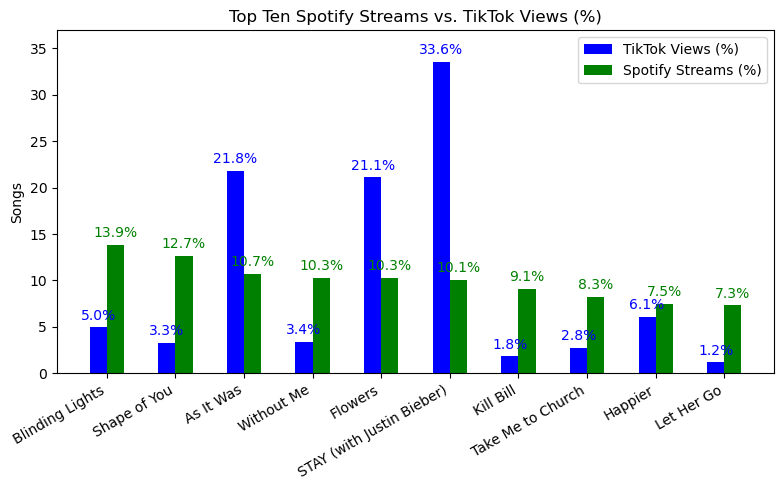

In [45]:
# Prepare the bar chart
x = np.arange(len(top_ten_spotify_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_spotify_df['TikTok Percentage'], width, label='TikTok Views (%)', color='blue')
spotify_bar = ax.bar(x+width/2, top_ten_spotify_df['Spotify Percentage'], width, label='Spotify Streams (%)', color='green')

# Formatting
ax.set_ylabel('Percentage (%)')
ax.set_ylabel('Songs')
ax.set_title('Top Ten Spotify Streams vs. TikTok Views (%)')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_spotify_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

# Fix y-limit to match percentage values
max_percentage = max(top_ten_spotify_df['TikTok Percentage'].max(), top_ten_spotify_df['Spotify Percentage'].max())
ax.set_ylim(0, max_percentage * 1.1)     # Set y-limit slightly above max percentage

# Add labels above bars
for i, (tiktok, spotify) in enumerate(zip(top_ten_spotify_df['TikTok Percentage'], top_ten_spotify_df['Spotify Percentage'])):
    ax.text(i - width/2, tiktok + 0.5, f"{tiktok:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(i + width/2, spotify + 0.5, f"{spotify:.1f}%", ha='center', va='bottom', fontsize=10, color='green')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()